In [1]:
import sys
import os

In [2]:
project_path = 'c:/Users/Firew Ayele/Desktop/kifiya/telecom_analysis'
sys.path.append(project_path)

Connect to the PostgreSQL database

In [4]:
import pandas as pd
from Database.db_connection import fetch_data_from_postgres

In [5]:
df =fetch_data_from_postgres()
print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [6]:
from src.utils import missing_values_table, convert_bytes_to_megabytes


 Perform initial data analysis

In [7]:

missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [8]:
df['HTTP DL (MB)'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.0          18338413.0   

sub-tasks

In [10]:
# Inspect column names
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


Identify the top 10 handsets

In [11]:
# Identify the top 10 handsets
top_10_handsets = df['Handset Manufacturer'].value_counts().head(10)
print(top_10_handsets)

Handset Manufacturer
Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: count, dtype: int64


Identify the top 3 manufacturers


In [13]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


For each top manufacturer, find the top 5 handsets

In [16]:

for manufacturer in top_3_manufacturers.index:
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:")
    print(top_5_handsets)

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


plotting top 5 handsets per top 3 handset manufacturer

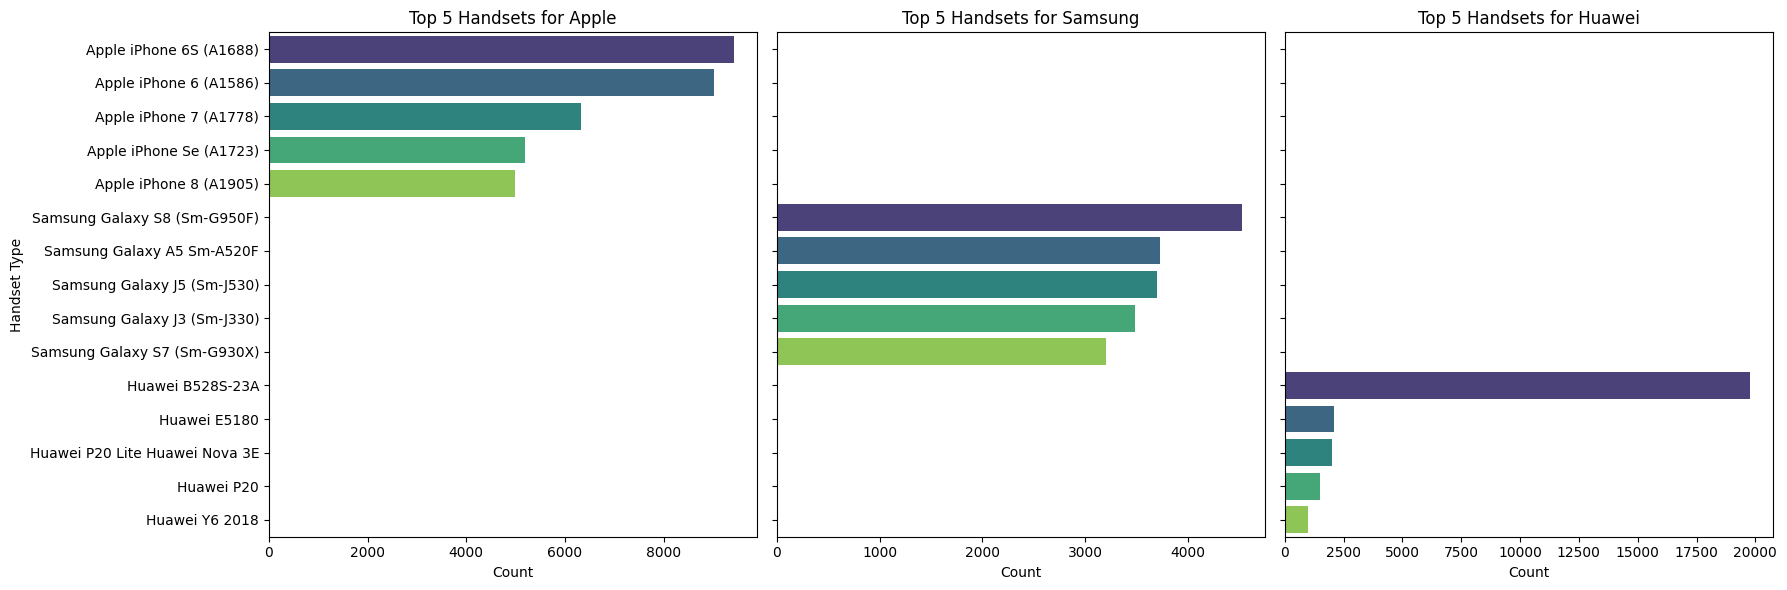

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 3 manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

# Create a bar plot for each manufacturer's top 5 handsets
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, manufacturer in enumerate(top_3_manufacturers.index):
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    
    sns.barplot(x=top_5_handsets.values, y=top_5_handsets.index, hue=top_5_handsets.index, ax=axes[i], palette="viridis", legend=False)
    axes[i].set_title(f'Top 5 Handsets for {manufacturer}')
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.show()


Task 1.1

Aggregate per user the following information in the column

number of xDR sessions

In [28]:
# Group the data by user identifier
user_grouped = df.groupby('IMSI')

# Calculate the number of xDR sessions for each user
user_sessions = user_grouped.size().reset_index(name='NumSessions')


Session duration

In [29]:
# Compute the total session duration for each user
user_session_duration = user_grouped['Dur. (ms)'].sum().reset_index(name='TotalSessionDuration')


the total download (DL) and upload (UL) data

In [32]:
# Sum the download (DL) and upload (UL) data for each user
user_data_usage = user_grouped[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()

# Merge the dataframes to get the total data volume for each user
user_data_volume = pd.merge(user_session_duration, user_data_usage, on='IMSI')


# Calculate the total data volume (in bytes) during each session for each application
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in applications:
    app_dl_col = f'{app} DL (Bytes)'
    app_ul_col = f'{app} UL (Bytes)'
    user_data_volume[app] = user_grouped[app_dl_col].fillna(0) + user_grouped[app_ul_col].fillna(0)


C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_14880\2611756029.py:13: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  user_data_volume[app] = user_grouped[app_dl_col].fillna(0) + user_grouped[app_ul_col].fillna(0)
C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_14880\2611756029.py:13: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  user_data_volume[app] = user_grouped[app_dl_col].fillna(0) + user_grouped[app_ul_col].fillna(0)
C:\Users\Firew Ayele\AppData\Local\Temp\ipykernel_14880\2611756029.py:13: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() 